In [1]:
import pandas as pd
import numpy as np

In [2]:
total_crop_dataset = pd.read_csv('../crop_production.csv')

In [3]:
tamil_nadu = total_crop_dataset[total_crop_dataset['State_Name']=='Tamil Nadu']

In [4]:
tamil_nadu.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177668,Tamil Nadu,ARIYALUR,2008,Kharif,Rice,24574.0,NaN
177669,Tamil Nadu,ARIYALUR,2008,Whole Year,Arhar/Tur,209.0,NaN
177670,Tamil Nadu,ARIYALUR,2008,Whole Year,Bajra,565.0,NaN
177671,Tamil Nadu,ARIYALUR,2008,Whole Year,Banana,190.0,NaN
177672,Tamil Nadu,ARIYALUR,2008,Whole Year,Cashewnut,31113.0,NaN


In [5]:
tamil_nadu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13547 entries, 177668 to 191214
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13547 non-null  object 
 1   District_Name  13547 non-null  object 
 2   Crop_Year      13547 non-null  int64  
 3   Season         13547 non-null  object 
 4   Crop           13547 non-null  object 
 5   Area           13547 non-null  float64
 6   Production     13266 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 846.7+ KB


In [6]:
tamil_nadu.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       281
dtype: int64

In [7]:
tamil_nadu = tamil_nadu.dropna()

In [8]:
tamil_nadu['District_Name'].nunique()

31

In [9]:
tamil_nadu_filtered = tamil_nadu[
    (tamil_nadu['Crop']=='Wheat') | 
    (tamil_nadu['Crop']=='Rice')  |
    (tamil_nadu['Crop']=='Jowar')  |
    (tamil_nadu['Crop']=='Bajra')  |
    (tamil_nadu['Crop']=='Cardamom')  |
    (tamil_nadu['Crop']=='Garlic')  |
    (tamil_nadu['Crop']=='Turmeric')  |
    (tamil_nadu['Crop']=='Ginger')  |
    (tamil_nadu['Crop']=='Cotton(lint)')  |
    (tamil_nadu['Crop']=='Linseed')  |
    (tamil_nadu['Crop']=='Sesamum')  |
    (tamil_nadu['Crop']=='Coconut ')  |
    (tamil_nadu['Crop']=='Onion')  |
    (tamil_nadu['Crop']=='Arhar/Tur')  |
    (tamil_nadu['Crop']=='Potato')  |
    (tamil_nadu['Crop']=='Maize')  
]

In [10]:
tamil_nadu_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4355 entries, 177690 to 191214
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     4355 non-null   object 
 1   District_Name  4355 non-null   object 
 2   Crop_Year      4355 non-null   int64  
 3   Season         4355 non-null   object 
 4   Crop           4355 non-null   object 
 5   Area           4355 non-null   float64
 6   Production     4355 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 272.2+ KB


In [30]:
tamil_nadu_filtered_ohe = pd.get_dummies(tamil_nadu, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [31]:
tamil_nadu_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_COIMBATORE,District_Name_CUDDALORE,District_Name_DHARMAPURI,District_Name_DINDIGUL,District_Name_ERODE,District_Name_KANCHIPURAM,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam
177690,Tamil Nadu,2009,25978.0,80462.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177691,Tamil Nadu,2009,404.0,649.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177692,Tamil Nadu,2009,160.0,122.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177693,Tamil Nadu,2009,644.0,1082.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177694,Tamil Nadu,2009,134.0,5761.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tamil_nadu_filtered_ohe.isnull().sum()

State_Name                  0
Crop_Year                   0
Area                        0
Production                  0
District_Name_COIMBATORE    0
                           ..
Crop_Urad                   0
Crop_Varagu                 0
Crop_Water Melon            0
Crop_Wheat                  0
Crop_Yam                    0
Length: 119, dtype: int64

In [33]:
X = tamil_nadu_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values

In [34]:
y = tamil_nadu_filtered_ohe.iloc[:,3].values

In [35]:
y

array([8.0462e+04, 6.4900e+02, 1.2200e+02, ..., 8.4000e+01, 1.2000e+02,
       1.5000e+01])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso()

In [39]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1184518237796063e+18, tolerance: 458340412198780.1
  positive)


Lasso()

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [41]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
y_pred = rfregressor.predict(X_test)

In [43]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

47.749853858332735 %


In [44]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

8.597600550849261 %


In [45]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

8.597887589156539 %


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

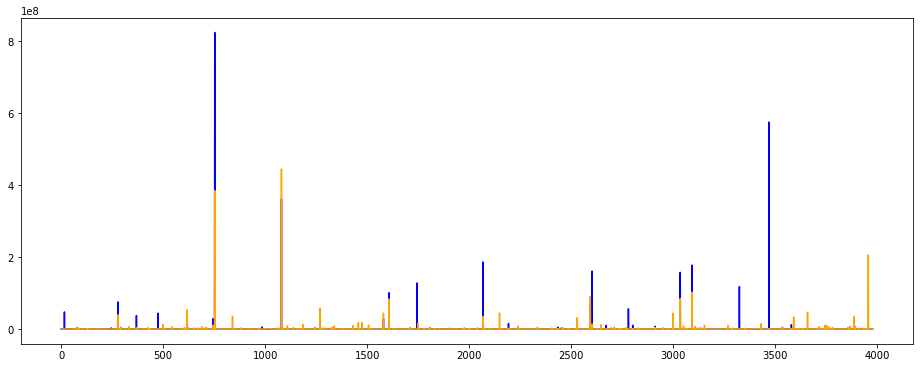

In [46]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')